In [1]:
!nvidia-smi

Sat Jul 19 07:55:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Verify all files and directories

!ls /kaggle/input/waste-dataset3

!ls /kaggle/input/waste-dataset3/train
!ls /kaggle/input/waste-dataset3/val  
!ls /kaggle/input/waste-dataset3/test 

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  val
images	labels
images	labels
images	labels


In [3]:
#Install requirements
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstal

In [4]:
# Train model
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Load pretrained
model.train(data="/kaggle/input/waste-dataset3/data.yaml", 
            epochs=60, 
            imgsz=640,
            batch=16,
            hsv_h=0.01,
            hsv_s=0.4,
            hsv_v=0.3,
            device=[0,1]
           )

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 79.6MB/s]


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/waste-dataset3/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.4, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimiz

100%|██████████| 755k/755k [00:00<00:00, 16.8MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.5±1.7 ms, read: 8.7±3.4 MB/s, size: 53.4 KB)


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:54<00:00, 208.05it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/waste-dataset3/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9058, len(boxes) = 29962. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.7±2.0 MB/s, size: 53.8 KB)


val: Scanning /kaggle/input/waste-dataset3/val/labels... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:04<00:00, 199.94it/s]0it/s]
train: Scanning /kaggle/input/waste-dataset3/train/labels... 1337 images, 0 backgrounds, 0 corrupt:  12%|█▏        | 1337/11244 [00:02<00:20, 472.49it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/waste-dataset3/val is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 819, len(boxes) = 2429. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


train: Scanning /kaggle/input/waste-dataset3/train/labels... 1637 images, 0 backgrounds, 0 corrupt:  15%|█▍        | 1637/11244 [00:03<00:19, 488.35it/s]

Plotting labels to runs/detect/train/labels.jpg... 


train: Scanning /kaggle/input/waste-dataset3/train/labels... 3827 images, 0 backgrounds, 0 corrupt:  34%|███▍      | 3827/11244 [00:07<00:14, 497.45it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


train: Scanning /kaggle/input/waste-dataset3/train/labels... 11244 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11244/11244 [00:22<00:00, 506.22it/s]
       1/60      1.13G      1.223      2.601       1.42         30        640: 100%|██████████| 703/703 [02:46<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.11it/s]


                   all        800       2429      0.594      0.595      0.598      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      1.33G      1.241      1.953      1.408         38        640: 100%|██████████| 703/703 [01:57<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.19it/s]


                   all        800       2429      0.675      0.567      0.637      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      1.34G      1.308      1.896      1.469         12        640: 100%|██████████| 703/703 [01:59<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.91it/s]


                   all        800       2429      0.614      0.504      0.537      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      1.36G      1.376      1.858      1.524         17        640: 100%|██████████| 703/703 [01:58<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.02it/s]


                   all        800       2429      0.622      0.493      0.547      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      1.37G      1.318      1.703      1.494         19        640: 100%|██████████| 703/703 [01:57<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.08it/s]


                   all        800       2429      0.706      0.669      0.726      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      1.38G      1.298      1.609      1.479         24        640: 100%|██████████| 703/703 [01:57<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.59it/s]


                   all        800       2429      0.727      0.597      0.678      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      1.39G      1.264      1.501      1.451         22        640: 100%|██████████| 703/703 [01:59<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.90it/s]


                   all        800       2429      0.747      0.666      0.744      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60       1.4G      1.233       1.43      1.425         36        640: 100%|██████████| 703/703 [02:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.80it/s]


                   all        800       2429      0.726      0.709      0.756      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      1.41G      1.211      1.375       1.41         18        640: 100%|██████████| 703/703 [01:59<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.29it/s]


                   all        800       2429      0.764      0.676      0.764      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      1.42G      1.196      1.344      1.402         34        640: 100%|██████████| 703/703 [01:57<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.43it/s]


                   all        800       2429      0.784      0.711      0.791      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      1.44G      1.167      1.281      1.379         51        640: 100%|██████████| 703/703 [02:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.24it/s]


                   all        800       2429      0.757      0.724      0.771      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      1.45G      1.149      1.257      1.374         40        640: 100%|██████████| 703/703 [02:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.28it/s]


                   all        800       2429      0.789      0.719      0.793      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      1.46G      1.148      1.247      1.373         25        640: 100%|██████████| 703/703 [01:58<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.18it/s]


                   all        800       2429      0.777      0.735      0.801      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      1.47G      1.133      1.209      1.362         30        640: 100%|██████████| 703/703 [02:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.94it/s]


                   all        800       2429      0.794      0.733      0.804      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      1.48G      1.119      1.166      1.344         16        640: 100%|██████████| 703/703 [01:59<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.22it/s]


                   all        800       2429      0.803      0.748      0.812       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      1.49G      1.121      1.182      1.354         75        640: 100%|██████████| 703/703 [02:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.30it/s]


                   all        800       2429      0.839      0.742      0.828      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60       1.5G      1.105      1.126      1.335         19        640: 100%|██████████| 703/703 [01:58<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.36it/s]


                   all        800       2429      0.823      0.758      0.837      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      1.52G      1.099      1.115      1.333         53        640: 100%|██████████| 703/703 [01:59<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.38it/s]


                   all        800       2429       0.83      0.769      0.839       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      1.53G      1.088      1.098       1.32         27        640: 100%|██████████| 703/703 [01:58<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.52it/s]


                   all        800       2429      0.838      0.783      0.849      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      1.54G      1.078      1.078      1.318         22        640: 100%|██████████| 703/703 [01:56<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.08it/s]


                   all        800       2429      0.832      0.771      0.841      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      1.55G       1.07       1.06      1.311         24        640: 100%|██████████| 703/703 [01:58<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.43it/s]


                   all        800       2429       0.82      0.773      0.844      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      1.56G      1.069      1.053      1.308         32        640: 100%|██████████| 703/703 [01:58<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.41it/s]


                   all        800       2429      0.825      0.773      0.838      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      1.57G      1.056      1.026      1.298         26        640: 100%|██████████| 703/703 [01:58<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.51it/s]


                   all        800       2429      0.835      0.786      0.845      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      1.58G       1.05      1.016      1.299         32        640: 100%|██████████| 703/703 [01:57<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.43it/s]


                   all        800       2429      0.833      0.793      0.848      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60       1.6G      1.035     0.9851      1.288         30        640: 100%|██████████| 703/703 [01:57<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.15it/s]


                   all        800       2429      0.863      0.771      0.853      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      1.61G      1.041     0.9895      1.285         31        640: 100%|██████████| 703/703 [01:58<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.46it/s]


                   all        800       2429      0.858      0.792      0.857      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      1.62G      1.022     0.9663      1.275         30        640: 100%|██████████| 703/703 [01:58<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.17it/s]


                   all        800       2429       0.84      0.781      0.852      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      1.63G      1.027     0.9724      1.278         12        640: 100%|██████████| 703/703 [01:58<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.59it/s]


                   all        800       2429      0.834      0.801      0.858      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      1.64G      1.022      0.956      1.269         29        640: 100%|██████████| 703/703 [01:56<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.60it/s]


                   all        800       2429      0.845      0.803       0.86       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      1.65G      1.001     0.9398      1.262         16        640: 100%|██████████| 703/703 [01:59<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.82it/s]


                   all        800       2429      0.832      0.802      0.858      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      1.66G      1.002      0.919      1.257         16        640: 100%|██████████| 703/703 [01:57<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.50it/s]


                   all        800       2429      0.823      0.812      0.861       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      1.68G     0.9903     0.9328      1.258         28        640: 100%|██████████| 703/703 [01:57<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.55it/s]


                   all        800       2429      0.829      0.801      0.864      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      1.69G     0.9984     0.9033      1.257         14        640: 100%|██████████| 703/703 [01:58<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.18it/s]


                   all        800       2429      0.855      0.804      0.869      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60       1.7G      0.994     0.9092      1.255         22        640: 100%|██████████| 703/703 [01:59<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.46it/s]


                   all        800       2429      0.844      0.816      0.869      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      1.71G     0.9877     0.9038      1.251         11        640: 100%|██████████| 703/703 [01:56<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.98it/s]


                   all        800       2429      0.825      0.822       0.86      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      1.72G     0.9907     0.8842      1.252         21        640: 100%|██████████| 703/703 [01:57<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.36it/s]


                   all        800       2429      0.847      0.816      0.868      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      1.73G     0.9704     0.8817      1.239         45        640: 100%|██████████| 703/703 [02:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.17it/s]


                   all        800       2429      0.837      0.842      0.872      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      1.74G     0.9604     0.8495      1.232         27        640: 100%|██████████| 703/703 [01:57<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.47it/s]


                   all        800       2429      0.839      0.823      0.864      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      1.76G     0.9506     0.8389       1.23         17        640: 100%|██████████| 703/703 [01:58<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.26it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.856      0.808      0.864      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      1.77G     0.9584     0.8539      1.231         24        640: 100%|██████████| 703/703 [01:59<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.47it/s]


                   all        800       2429      0.858       0.82      0.871      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      1.78G     0.9562     0.8415      1.229         36        640: 100%|██████████| 703/703 [01:56<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.62it/s]


                   all        800       2429      0.832      0.835      0.872      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      1.79G     0.9591     0.8415      1.232         23        640: 100%|██████████| 703/703 [01:55<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.66it/s]


                   all        800       2429      0.847      0.827      0.873      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60       1.8G     0.9451     0.8242      1.221         20        640: 100%|██████████| 703/703 [01:55<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.34it/s]


                   all        800       2429      0.835      0.833       0.87       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      1.81G     0.9429     0.8061      1.217         38        640: 100%|██████████| 703/703 [01:55<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.30it/s]


                   all        800       2429       0.85      0.828      0.872      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      1.82G     0.9246     0.7957       1.21         43        640: 100%|██████████| 703/703 [01:56<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.45it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429      0.855      0.827      0.872      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      1.84G     0.9412     0.8011      1.213         10        640: 100%|██████████| 703/703 [01:58<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.33it/s]


                   all        800       2429      0.851      0.834      0.873      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      1.85G     0.9238     0.7912      1.206         21        640: 100%|██████████| 703/703 [01:57<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.60it/s]


                   all        800       2429      0.859      0.832      0.877      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      1.86G     0.9183     0.7754      1.199         38        640: 100%|██████████| 703/703 [01:57<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.21it/s]


                   all        800       2429      0.855       0.84      0.877      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      1.87G     0.9106     0.7762      1.201         26        640: 100%|██████████| 703/703 [01:59<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.03it/s]


                   all        800       2429      0.855      0.837      0.876      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      1.88G     0.9113      0.759      1.199         20        640: 100%|██████████| 703/703 [01:59<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.39it/s]


                   all        800       2429      0.864      0.832      0.875      0.702
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      1.89G     0.8688     0.6774      1.183         32        640: 100%|██████████| 703/703 [01:54<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.63it/s]


                   all        800       2429      0.868      0.824      0.874      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60       1.9G     0.8502     0.6436      1.173         33        640: 100%|██████████| 703/703 [01:55<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.40it/s]


                   all        800       2429      0.865      0.832      0.878      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      1.92G     0.8379     0.6454      1.173         12        640: 100%|██████████| 703/703 [01:54<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.13it/s]


                   all        800       2429       0.86       0.84       0.88      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      1.93G     0.8321     0.6381       1.16         28        640: 100%|██████████| 703/703 [01:51<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.46it/s]


                   all        800       2429      0.859      0.844       0.88      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      1.94G     0.8178     0.6114      1.148         15        640: 100%|██████████| 703/703 [01:55<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.34it/s]


                   all        800       2429      0.872      0.833      0.877      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      1.95G     0.8217     0.5999      1.144         15        640: 100%|██████████| 703/703 [01:52<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.39it/s]


                   all        800       2429       0.87       0.83      0.878      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      1.96G     0.8083      0.597      1.139         12        640: 100%|██████████| 703/703 [01:54<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.49it/s]


                   all        800       2429      0.877      0.832      0.879      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      1.97G     0.8113     0.5949      1.141         14        640: 100%|██████████| 703/703 [01:55<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.37it/s]
  0%|          | 0/703 [00:00<?, ?it/s]

                   all        800       2429       0.88      0.829      0.877      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      1.98G     0.7953     0.5879      1.136          9        640: 100%|██████████| 703/703 [01:54<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.05it/s]


                   all        800       2429       0.87      0.832      0.877      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60         2G     0.8011     0.5828      1.134         13        640: 100%|██████████| 703/703 [01:55<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.50it/s]


                   all        800       2429      0.869      0.831      0.877      0.704

60 epochs completed in 2.061 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.37it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        800       2429      0.859      0.844       0.88      0.704
            food_waste        358       1353      0.675      0.576      0.627      0.436
                 metal        177        270      0.919      0.974      0.974      0.863
                 paper        113        267      0.942       0.94      0.968      0.785
               plastic        263        539        0.9      0.887       0.95      0.733
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


In [5]:
# Copy the best model to Kaggle's working directory
!cp /kaggle/working/runs/detect/train/weights/best.pt /kaggle/working/

# Verify the file exists
!ls /kaggle/working

best.pt  runs  yolo11n.pt  yolov8n.pt


In [6]:
# Model Demonstration on 20 Test Images 
from ultralytics import YOLO
import os

# Load trained model
model = YOLO("/kaggle/working/best.pt")

# Predict on test images 
test_dir = "/kaggle/input/waste-dataset3/test/images"
test_images = [os.path.join(test_dir, f) for f in os.listdir(test_dir)][:20] 

results = model.predict(
    source = test_images,  
    conf = 0.5,        
    save = True      
)


0: 640x640 2 papers, 4.9ms
1: 640x640 1 food_waste, 4.9ms
2: 640x640 1 metal, 4.9ms
3: 640x640 2 food_wastes, 4.9ms
4: 640x640 1 plastic, 4.9ms
5: 640x640 (no detections), 4.9ms
6: 640x640 2 papers, 4.9ms
7: 640x640 2 plastics, 4.9ms
8: 640x640 2 food_wastes, 4.9ms
9: 640x640 2 metals, 4.9ms
10: 640x640 1 metal, 4.9ms
11: 640x640 1 paper, 4.9ms
12: 640x640 (no detections), 4.9ms
13: 640x640 1 plastic, 4.9ms
14: 640x640 1 metal, 4.9ms
15: 640x640 1 food_waste, 4.9ms
16: 640x640 1 metal, 4.9ms
17: 640x640 1 paper, 4.9ms
18: 640x640 1 paper, 4.9ms
19: 640x640 1 food_waste, 4.9ms
Speed: 3.1ms preprocess, 4.9ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


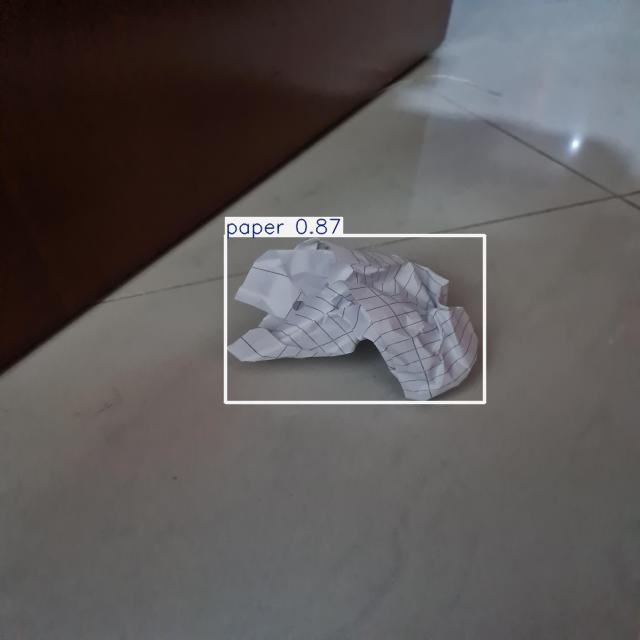

Displaying: 20220216_190731_jpg.rf.1ed69c4f98965fbdf2c057c249aef4c7.jpg


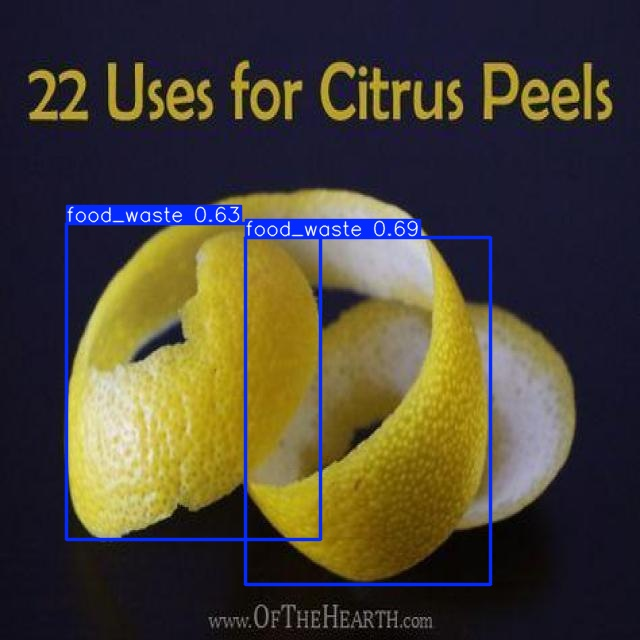

Displaying: 0a8842edb05715e8a200d57764a5cc6a-1089652973_jpg.rf.41bddabf8df971c84f905cb7710428b5.jpg


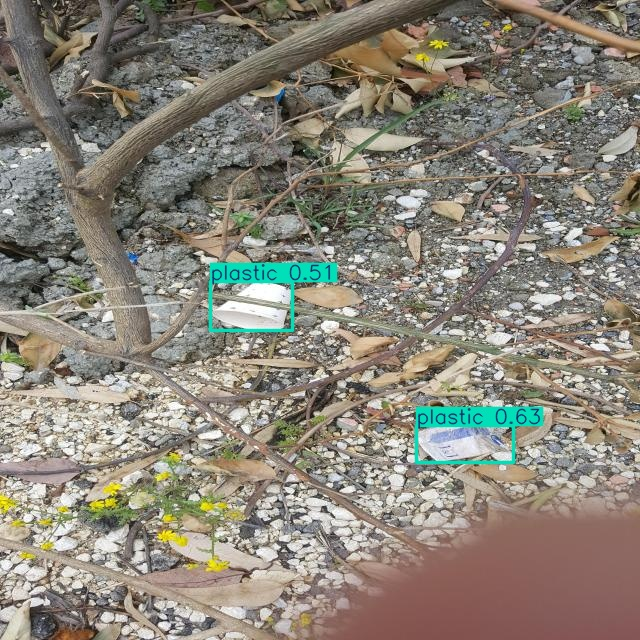

Displaying: batch_12_000035_jpg.rf.333f15e59314f2a5e2a47263a68d5265.jpg


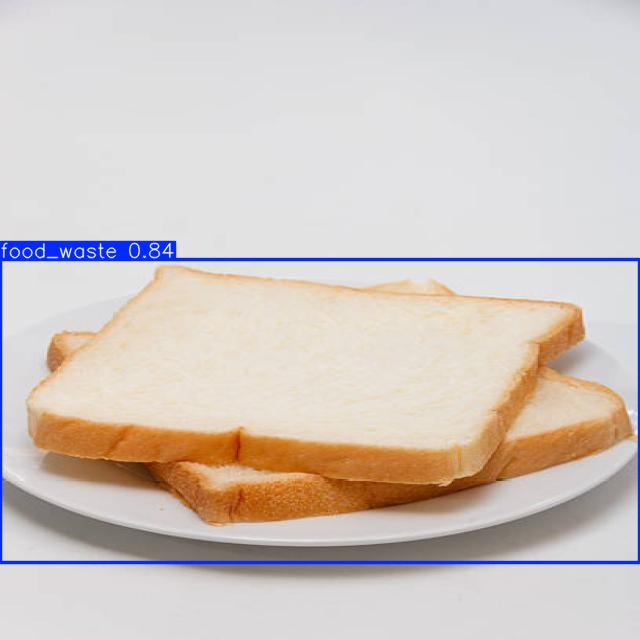

Displaying: 202220-3-_jpg.rf.ce714724ae8b98b86ee4d81b1b3d4ae7.jpg


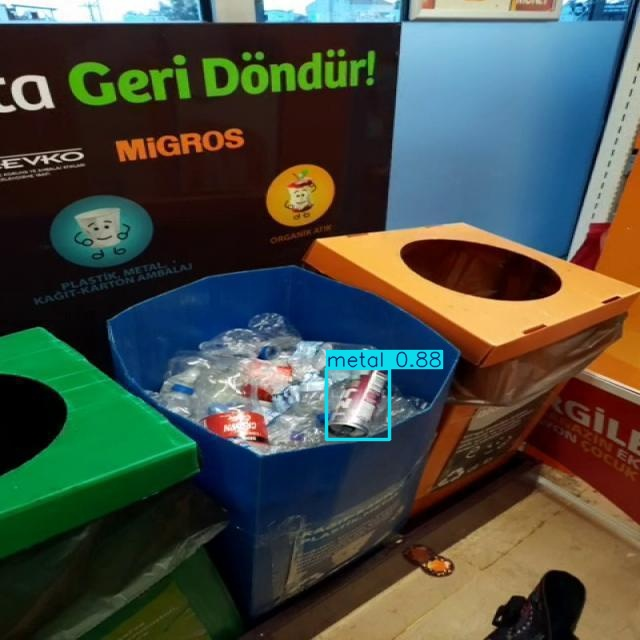

Displaying: 62b0acf7591de62b0acf7591e7_frame40_jpg.rf.72cda6ae8c3db97b67af43983ab5ad88.jpg


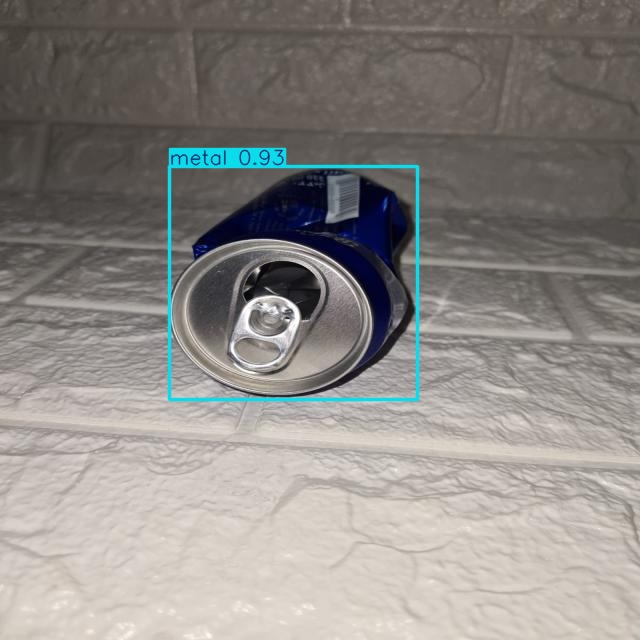

Displaying: 111_jpg.rf.a6b273dc78ea523581749f242211a2a3.jpg


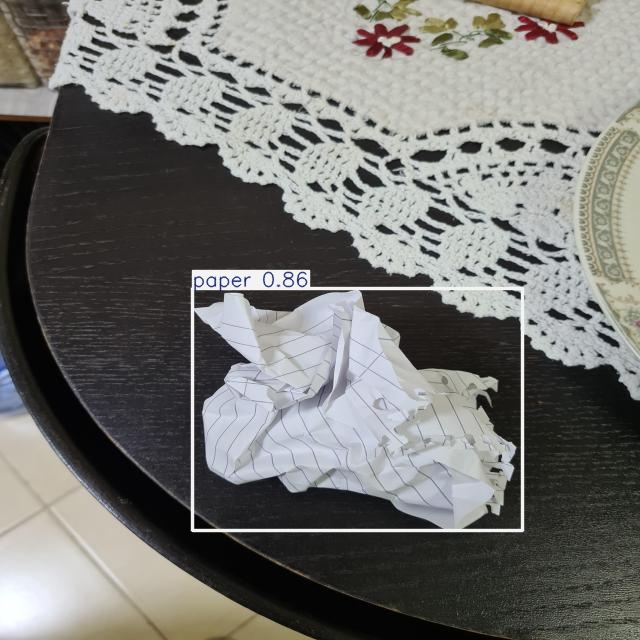

Displaying: 20220216_203414_jpg.rf.e393c08aeea1fa0d3be5b3a2d6c56577.jpg


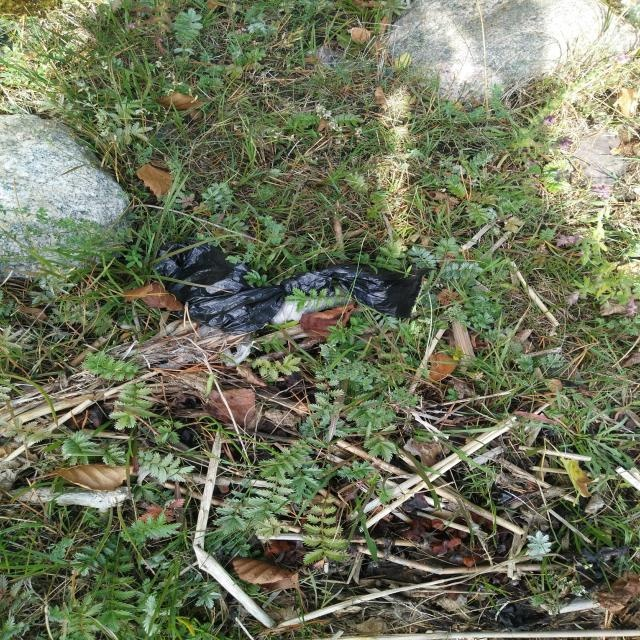

Displaying: batch_11_000044_jpg.rf.e92d82e7ab61f34da285e1a3a4755381.jpg


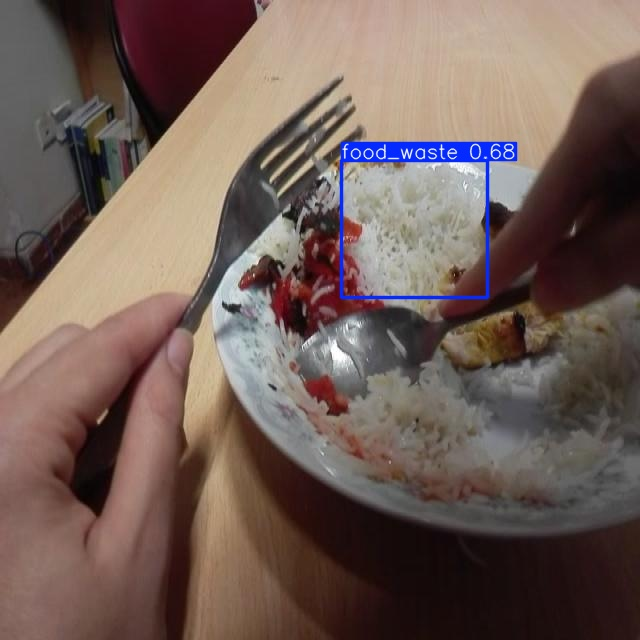

Displaying: VID_20230608_145626-088_jpg.rf.902a8a75ba4ea3631a719f15079ab47e.jpg


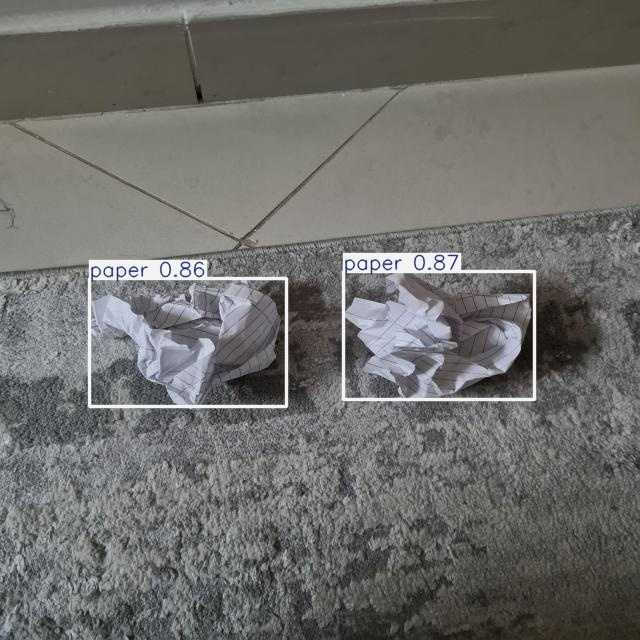

Displaying: 20220216_190933_jpg.rf.7b6439a5e6153bc047a48ad7b34c1bdf.jpg


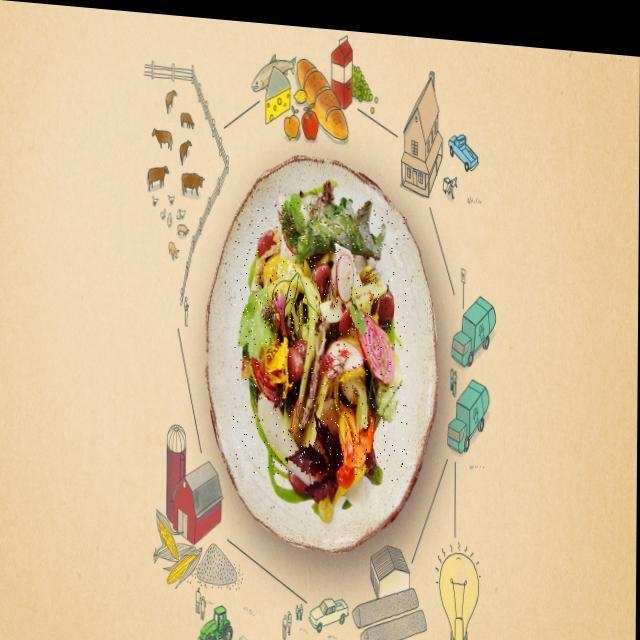

Displaying: cf30d63dca93f90e23fea9aa467e16312dc2bcbad8c5de42ddcdef9c9af8d0c9-_RI__jpg.rf.2ba0db564aa764e0d6ae1e57e28c8806.jpg


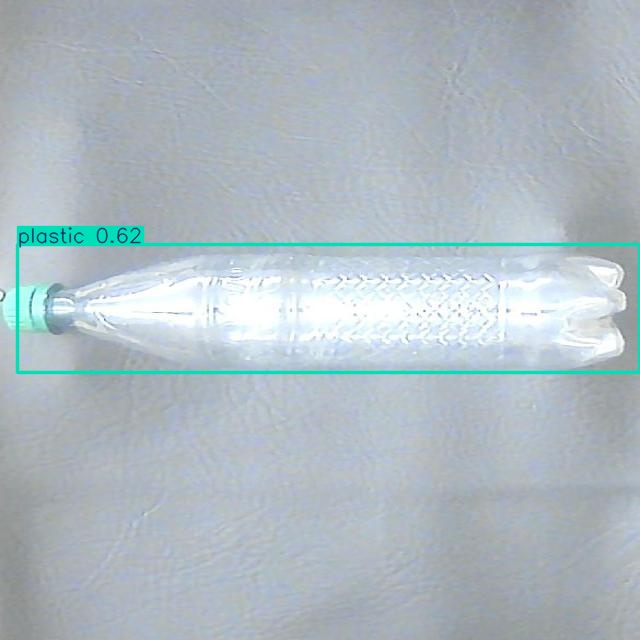

Displaying: cropped_pb_157_jpg.rf.8f176ad411608c9a2b89b2c8c2ccf61a.jpg


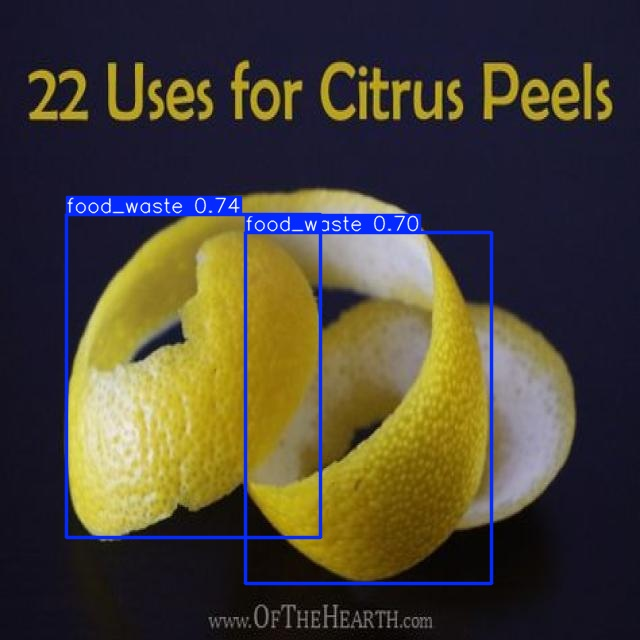

Displaying: 0a8842edb05715e8a200d57764a5cc6a-1089652973_jpg.rf.808268822cd0ee4cf52579c0a589bb0f.jpg


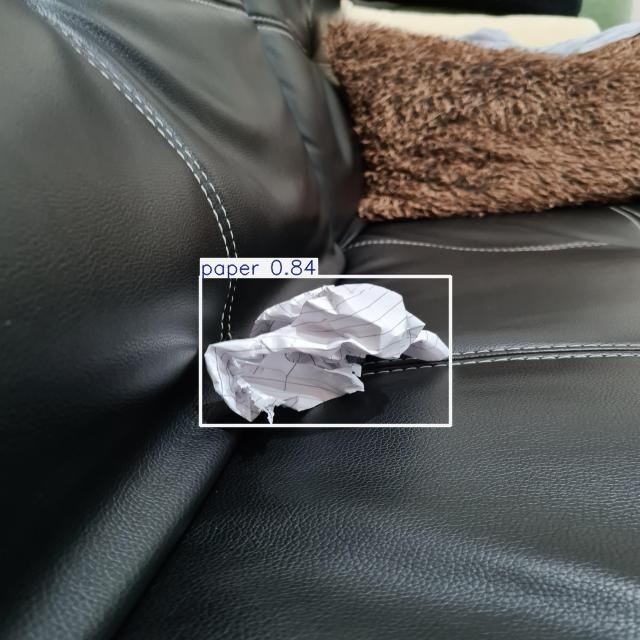

Displaying: 20220216_203647_jpg.rf.a2f4f6b9e63803754be505c456a3802c.jpg


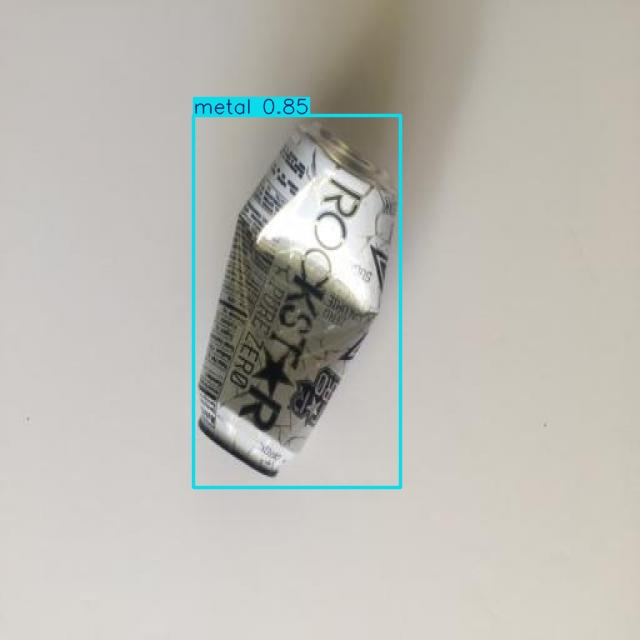

Displaying: AluCan3_jpg.rf.f1d37709b8af4d45aaf979bc07cdcc22.jpg


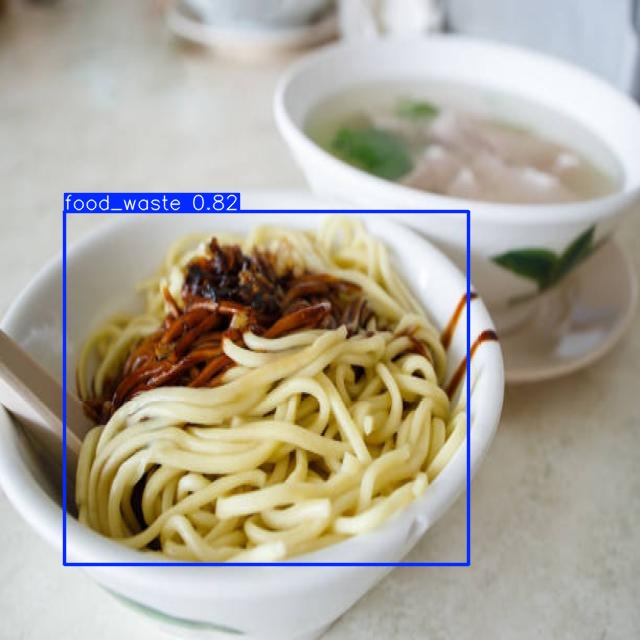

Displaying: istockphoto-1166957114-612x612_jpg.rf.2e2f69f7971ab001bd80f037fdd1126f.jpg


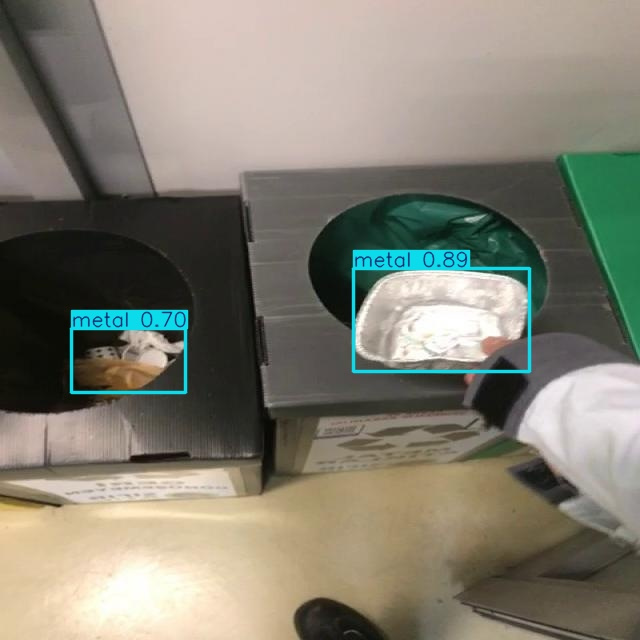

Displaying: 62bc37a7e064462bc37a7e064a_frame2_jpg.rf.f088debbb4ac40c20d91463e83c2c33e.jpg


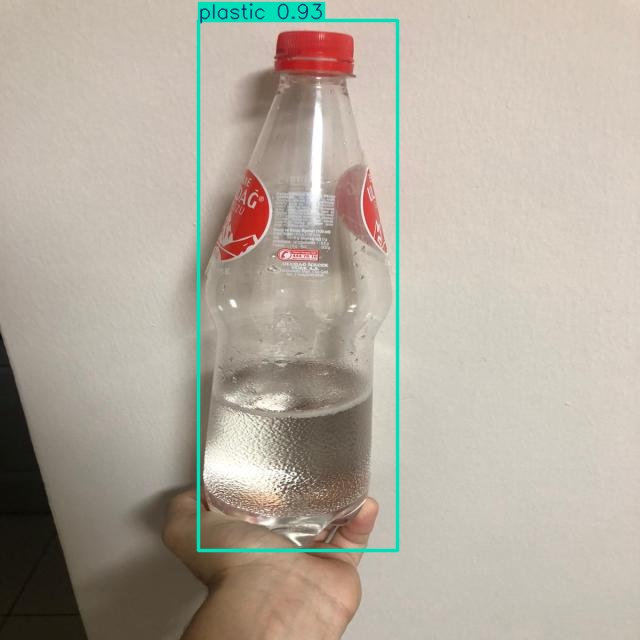

Displaying: IMG-20241216-WA0114_jpg.rf.84f6aa95df34611cea72af53b3a5217b.jpg


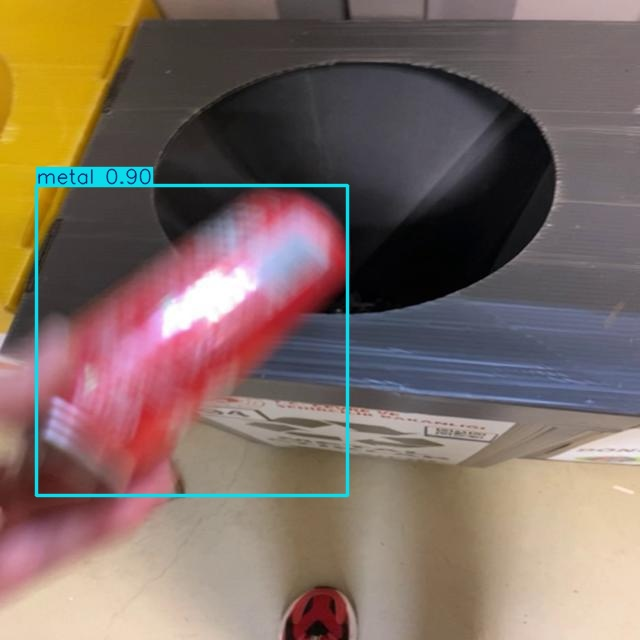

Displaying: 63971668873496397166887351_frame3_jpg.rf.066bc5f3b8c01d5a7b68b2dddafc4ec8.jpg


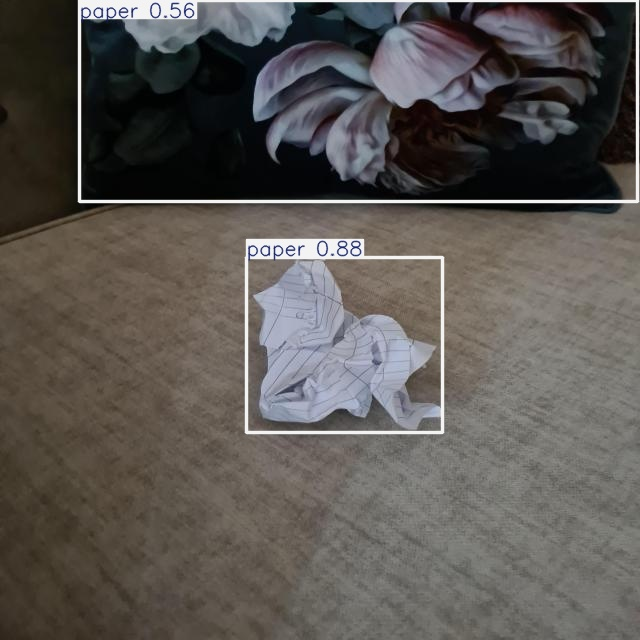

Displaying: 20220216_203540_jpg.rf.84cb0f7152b30455a51425646a38372c.jpg


In [7]:
# Visualization of Testing Results
from IPython.display import Image, display
import os

pred_dir = "/kaggle/working/runs/detect/predict/"

pred_images = [f for f in os.listdir(pred_dir) if f.endswith(('.jpg', '.png', '.jpeg'))] 

# Display first 20 predictions
for img_name in pred_images[:20]:
    img_path = os.path.join(pred_dir, img_name)
    display(Image(filename=img_path, width=600))
    print(f"Displaying: {img_name}")  

In [8]:
# Zips only the /kaggle/working/runs directory and provides download link

import os
import zipfile
from IPython.display import FileLink, display

def zip_and_download_runs():
    source_dir = '/kaggle/working/runs'
    zip_name = 'runs_output.zip'
    
    if not os.path.exists(source_dir):
        print(f"Error: Directory {source_dir} not found!")
        return
        
    # Create zip file
    with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(source_dir):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start='/kaggle/working')
                zipf.write(file_path, arcname)
                print(f"Added: {arcname}")
    
    # Verify zip was created
    if os.path.exists(zip_name):
        print(f"\nSuccess! Zip file created: {os.path.getsize(zip_name)/1024/1024:.2f} MB")
        print("Download link:")
        display(FileLink(zip_name))
    else:
        print("Failed to create zip file")

# Execute
zip_and_download_runs()

Added: runs/detect/train/results.csv
Added: runs/detect/train/results.png
Added: runs/detect/train/train_batch0.jpg
Added: runs/detect/train/train_batch2.jpg
Added: runs/detect/train/val_batch0_labels.jpg
Added: runs/detect/train/train_batch35152.jpg
Added: runs/detect/train/BoxF1_curve.png
Added: runs/detect/train/val_batch1_pred.jpg
Added: runs/detect/train/confusion_matrix_normalized.png
Added: runs/detect/train/val_batch2_labels.jpg
Added: runs/detect/train/val_batch1_labels.jpg
Added: runs/detect/train/BoxR_curve.png
Added: runs/detect/train/confusion_matrix.png
Added: runs/detect/train/train_batch35151.jpg
Added: runs/detect/train/train_batch1.jpg
Added: runs/detect/train/labels.jpg
Added: runs/detect/train/val_batch2_pred.jpg
Added: runs/detect/train/train_batch35150.jpg
Added: runs/detect/train/BoxPR_curve.png
Added: runs/detect/train/args.yaml
Added: runs/detect/train/val_batch0_pred.jpg
Added: runs/detect/train/BoxP_curve.png
Added: runs/detect/train/labels_correlogram.jpg
Ad

/kaggle/working/runs_output.zip